In [ ]:
import pandas as pd
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better graph styling
sns.set(style="whitegrid")


df = pd.read_csv('/content/drive/MyDrive/cardio_train.csv',sep=';')
display(df.head())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# Convert age from days to years and round it
df['age'] = (df['age'] / 365).astype(int)



In [ ]:
df['age'].describe()

,age
count,70000.000000
mean,52.840671
std,6.766774
min,29.000000
25%,48.000000
50%,53.000000
75%,58.000000
max,64.000000


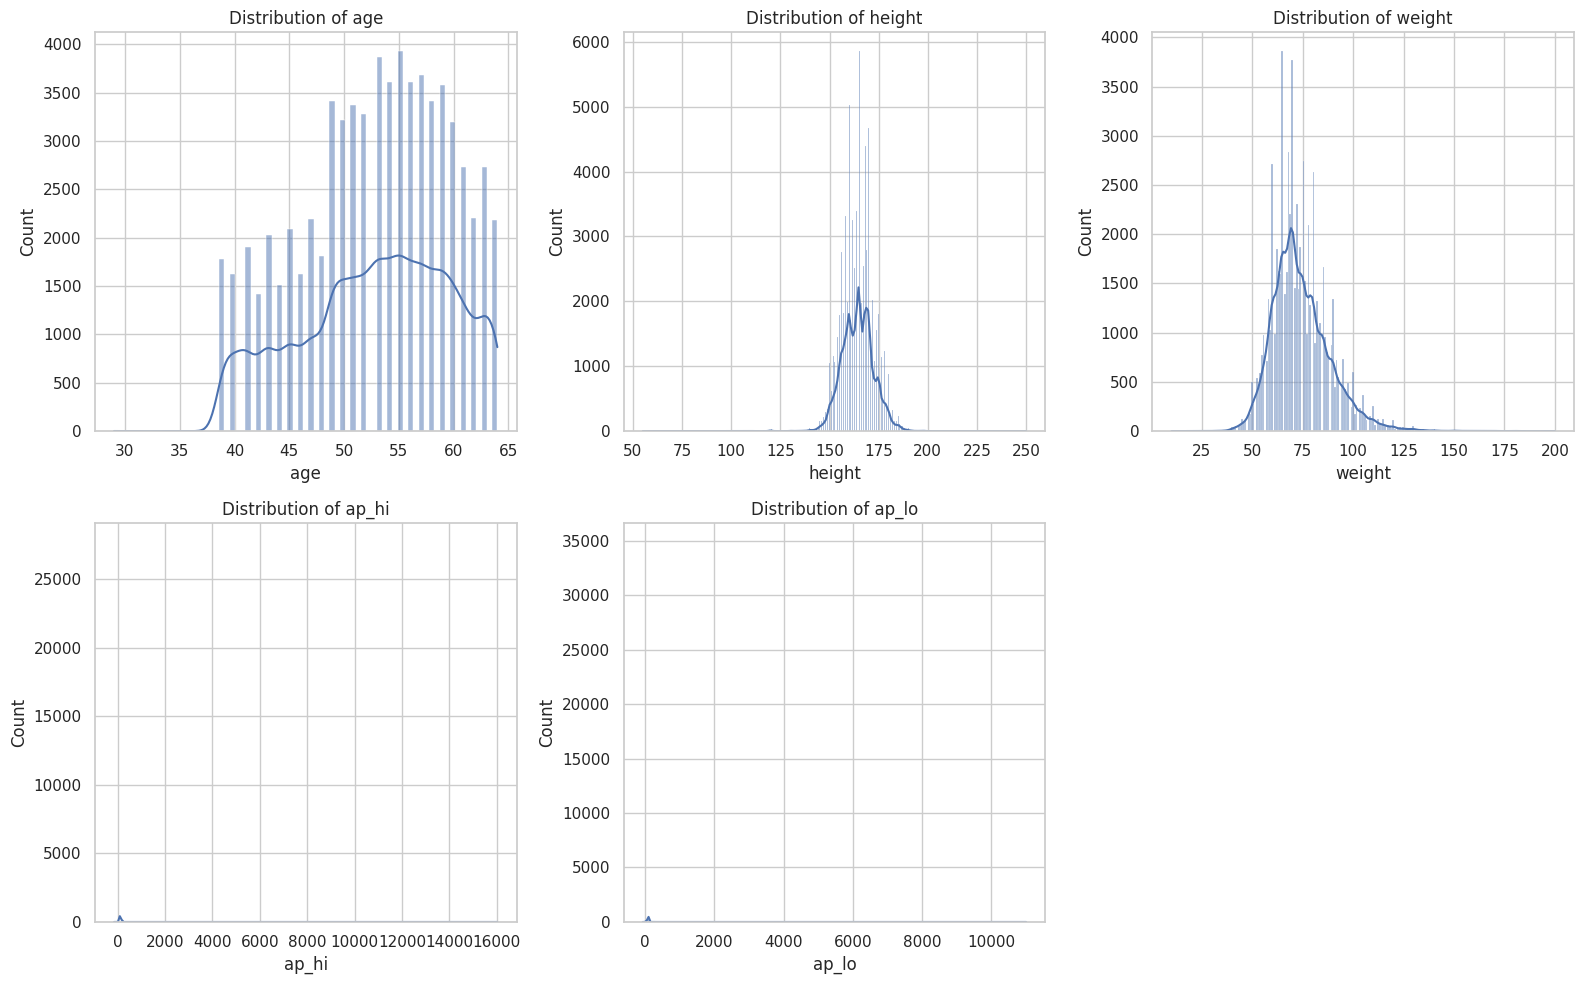

In [ ]:
# Plot distributions of key numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))

columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()


In [ ]:
print("Systolic BP (ap_hi) min/max:", df['ap_hi'].min(), df['ap_hi'].max())
print("Diastolic BP (ap_lo) min/max:", df['ap_lo'].min(), df['ap_lo'].max())

# Show extreme values
df[df['ap_hi'] > 250].head(10)


Systolic BP (ap_hi) min/max: -150 16020
Diastolic BP (ap_lo) min/max: -70 11000


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1876,2654,41,1,160,60.0,902,60,1,1,0,0,1,0
2014,2845,62,2,167,59.0,906,0,1,1,0,0,1,0
4817,6822,39,1,168,63.0,909,60,2,1,0,0,1,0
7763,11089,57,1,175,80.0,11500,90,1,1,0,0,1,1
8915,12710,51,1,164,75.0,1420,80,2,1,0,0,1,1
9557,13616,62,1,155,87.0,701,110,1,1,0,0,1,1
13895,19827,43,1,168,72.0,1500,80,1,1,0,0,1,1
17713,25314,61,2,163,50.0,907,70,3,3,0,0,1,1
23867,34120,44,1,161,92.0,906,0,2,1,0,0,1,1
25464,36339,43,2,169,75.0,14020,80,2,1,0,0,1,1


In [ ]:
# Remove negative and overly high values
df = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 60) & (df['ap_lo'] <= 180)]


In [ ]:
df = df[df['ap_hi'] > df['ap_lo']]


In [ ]:
print("New ap_hi range:", df['ap_hi'].min(), "-", df['ap_hi'].max())
print("New ap_lo range:", df['ap_lo'].min(), "-", df['ap_lo'].max())
print("New dataset shape:", df.shape)


New ap_hi range: 90 - 240
New ap_lo range: 60 - 180
New dataset shape: (68496, 13)


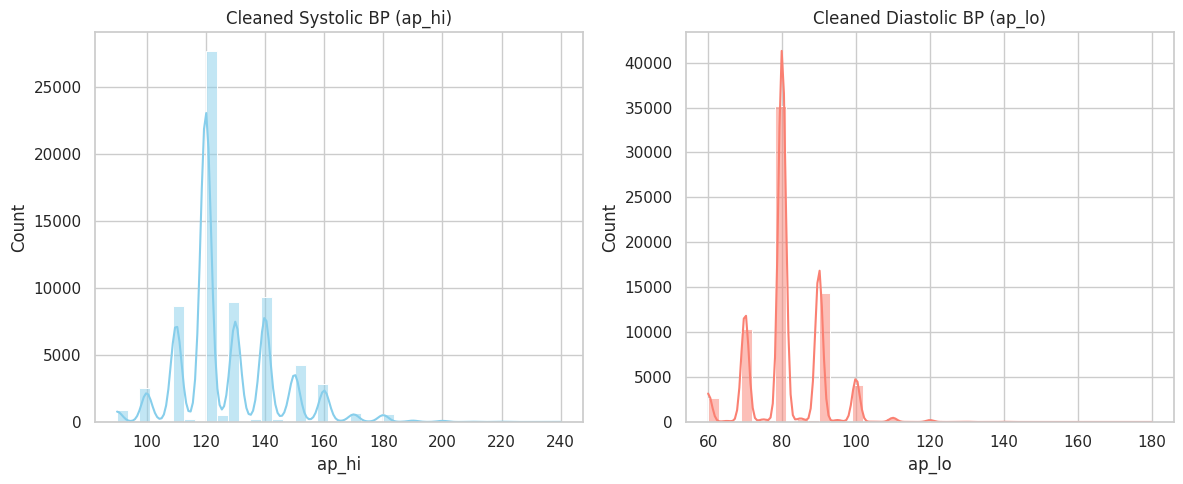

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['ap_hi'], bins=40, kde=True, color='skyblue')
plt.title('Cleaned Systolic BP (ap_hi)')

plt.subplot(1,2,2)
sns.histplot(df['ap_lo'], bins=40, kde=True, color='salmon')
plt.title('Cleaned Diastolic BP (ap_lo)')

plt.tight_layout()
plt.show()


In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['id'])  # 'id' has no predictive power

# Separate features and target
X = df.drop('cardio', axis=1)  # Features
y = df['cardio']               # Target


In [ ]:
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (54796, 11)
Testing set: (13700, 11)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      6919
           1       0.75      0.66      0.70      6781

    accuracy                           0.72     13700
   macro avg       0.73      0.72      0.72     13700
weighted avg       0.73      0.72      0.72     13700



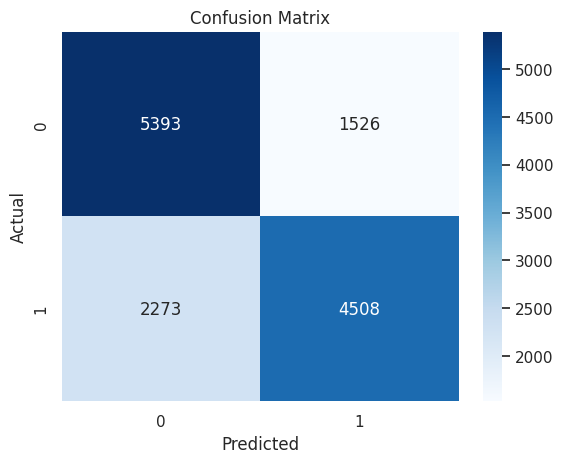

In [ ]:
# Predict on test set
y_pred = dt.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


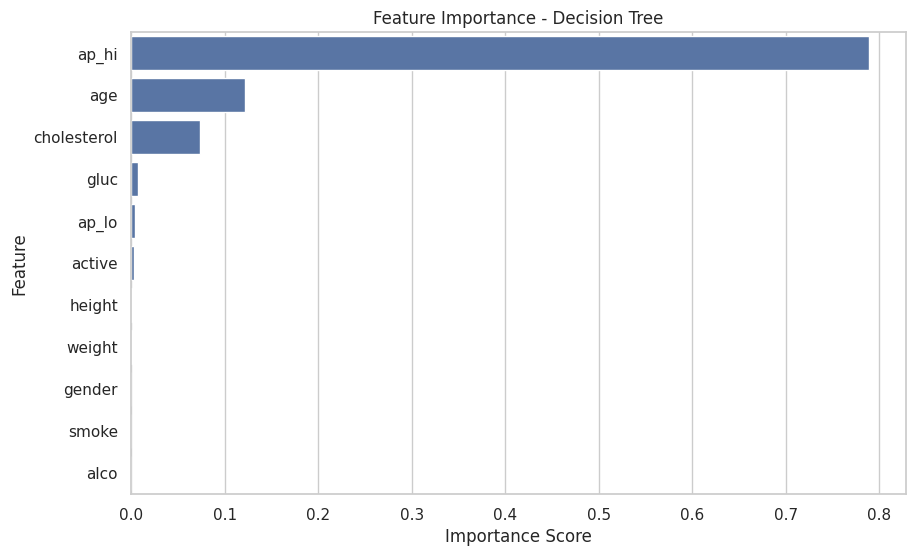

In [ ]:
# Plot feature importances
# 🔍 Explanation:
# This shows you which features (like age, ap_hi, weight) are most influential in predicting heart disease


import matplotlib.pyplot as plt
import numpy as np

feature_importance = pd.Series(dt.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      6919
           1       0.70      0.69      0.70      6781

    accuracy                           0.70     13700
   macro avg       0.70      0.70      0.70     13700
weighted avg       0.70      0.70      0.70     13700



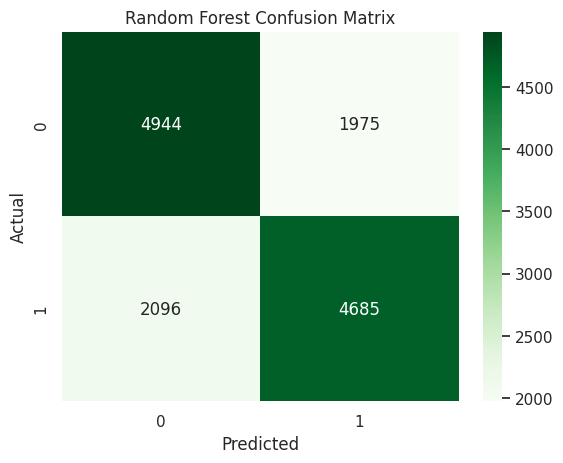

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


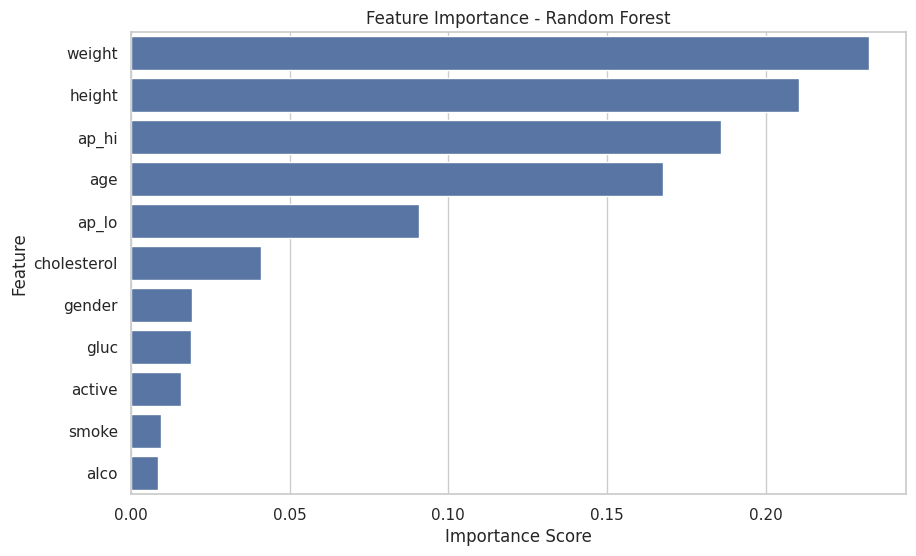

In [ ]:
# Calculate and sort feature importance
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
importances_rf = importances_rf.sort_values(ascending=False)

# Plot the top features
plt.figure(figsize=(10,6))
sns.barplot(x=importances_rf, y=importances_rf.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier


In [ ]:
# Create the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train it on the training data
xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:34:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict labels on the test set
y_pred_xgb = xgb.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      6919
           1       0.74      0.68      0.71      6781

    accuracy                           0.73     13700
   macro avg       0.73      0.73      0.73     13700
weighted avg       0.73      0.73      0.73     13700



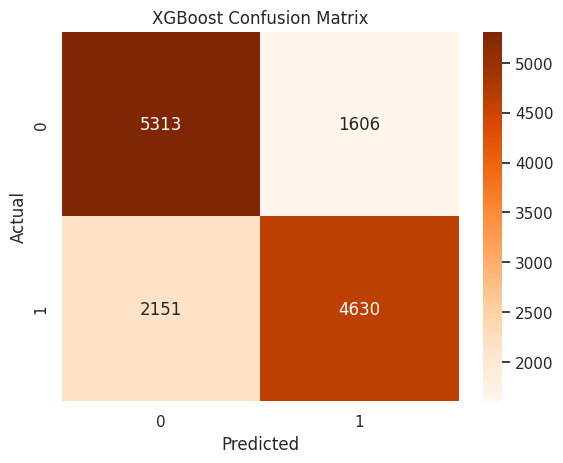

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


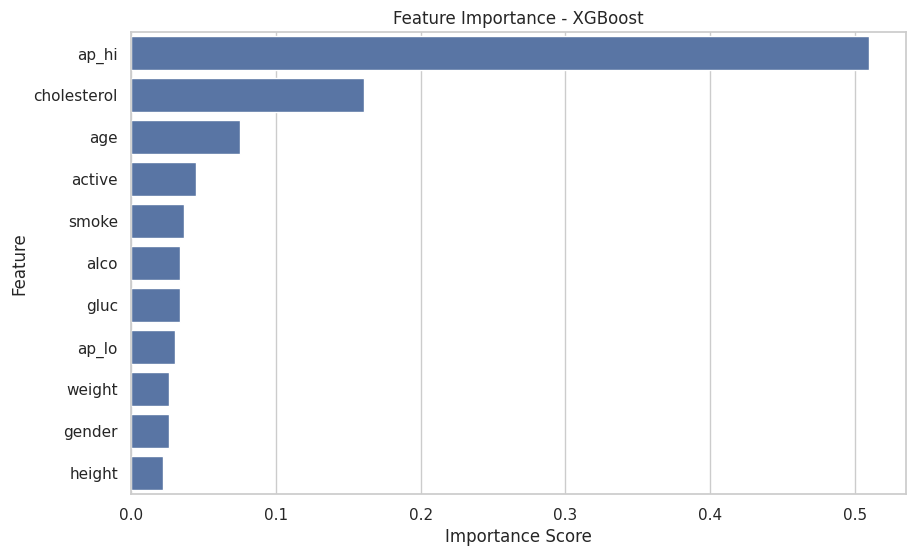

In [ ]:
# Plot feature importances
importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns)
importances_xgb = importances_xgb.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances_xgb, y=importances_xgb.index)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


SyntaxError: unterminated string literal (detected at line 7) (ipython-input-30-1579329034.py, line 7)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Dictionary to hold model results
results = {}

# Decision Tree
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

# Random Forest
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

# XGBoost
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb)
}


In [ ]:
# Convert to pandas DataFrame for pretty display
comparison_df = pd.DataFrame(results).T  # Transpose for better view
comparison_df = comparison_df.round(4)   # Round off to 4 decimal places
comparison_df


,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.7227,0.7471,0.6648,0.7036
Random Forest,0.7028,0.7035,0.6909,0.6971
XGBoost,0.7258,0.7425,0.6828,0.7114


In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
# Get predicted probabilities for each model
y_prob_dt = dt.predict_proba(X_test)[:, 1]     # Decision Tree
y_prob_rf = rf.predict_proba(X_test)[:, 1]     # Random Forest
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]   # XGBoost


In [ ]:
# Calculate FPR (x-axis), TPR (y-axis), and AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)


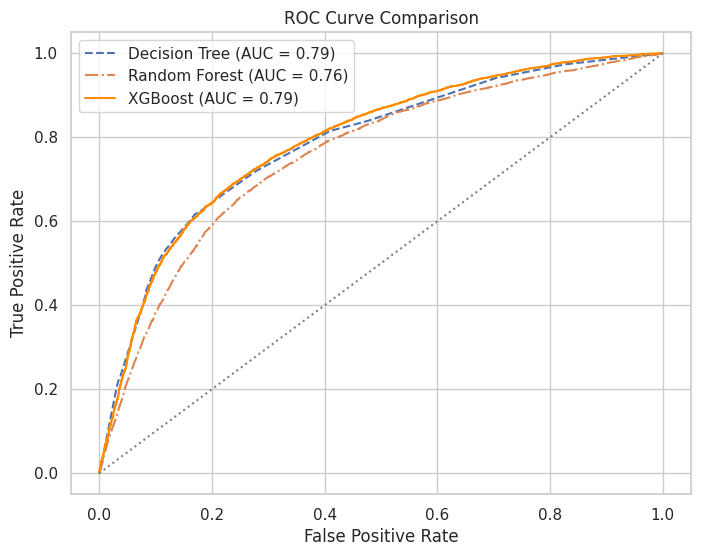

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='-.')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='darkorange')

# Diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# from sklearn.model_selection import cross_val_score

# # Decision Tree
# dt_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
# print("Decision Tree CV Accuracy:", dt_scores)
# print("Mean Accuracy:", dt_scores.mean().round(4), "\n")

# # Random Forest
# rf_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
# print("Random Forest CV Accuracy:", rf_scores)
# print("Mean Accuracy:", rf_scores.mean().round(4), "\n")

# # XGBoost
# xgb_scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
# print("XGBoost CV Accuracy:", xgb_scores)
# print("Mean Accuracy:", xgb_scores.mean().round(4))


Decision Tree CV Accuracy: [0.72788321 0.73465216 0.72742536 0.72786335 0.72837433]
Mean Accuracy: 0.7292 

Random Forest CV Accuracy: [0.70474453 0.71216877 0.7072779  0.70508796 0.70063508]
Mean Accuracy: 0.706 



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:44:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:45:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:45:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:45:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:45:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost CV Accuracy: [0.72562044 0.740857   0.72873932 0.73428717 0.73165925]
Mean Accuracy: 0.7322


In [ ]:


# Example patient data (values must match model columns)
new_patient = pd.DataFrame({
    'age': [50],           # Age in years
    'gender': [2],         # 1 = Female, 2 = Male
    'height': [172],       # in cm
    'weight': [82],        # in kg
    'ap_hi': [135],        # Systolic BP
    'ap_lo': [85],         # Diastolic BP
    'cholesterol': [2],    # 1 = Normal, 2 = Above normal, 3 = High
    'gluc': [1],           # 1 = Normal, 2 = Above normal, 3 = High
    'smoke': [0],          # 1 = Yes, 0 = No
    'alco': [0],           # 1 = Yes, 0 = No
    'active': [1]          # 1 = Active, 0 = Not active
})


In [ ]:
# Predict class (0 or 1)
pred = xgb.predict(new_patient)[0]

# Predict probability
prob = xgb.predict_proba(new_patient)[0][1]


In [ ]:
print("🧪 Patient Health Summary:\n")
print(new_patient.T)

print("\n🔍 Prediction Result:")
if pred == 1:
    print("⚠️ High Risk of Cardiovascular Disease")
else:
    print("✅ Low Risk (No Disease Detected)")

print(f"🧠 Confidence Score: {prob:.2f}")


🧪 Patient Health Summary:

               0
age           50
gender         2
height       172
weight        82
ap_hi        135
ap_lo         85
cholesterol    2
gluc           1
smoke          0
alco           0
active         1

🔍 Prediction Result:
⚠️ High Risk of Cardiovascular Disease
🧠 Confidence Score: 0.59
